# K-means算法实现
理论参考：https://www.cnblogs.com/lliuye/p/9144312.html

In [1]:
import numpy as np

In [2]:
#计算聚类中心
def cal_center(points):
    return np.mean(points,0)
# 计算欧式距离
def cal_distance(p1,p2):
    return np.linalg.norm(p2-p1)

In [3]:
#k-means流程
def Kmeans(points,steps=100):
    # 随机选取2个点作为中心
    total_num=points.shape[0]
    idx = np.arange(total_num)
    np.random.shuffle(idx)
    p1 = points[idx[0]]
    p2 = points[idx[1]]
    # 计算所有点到中心的距离，并划分簇
    center1 = p1
    center2 = p2
    for s in range(steps):
        # 迭代计算多少次
        g1= []
        g2= []
        #划分簇
        for i in range(total_num):
            dist1 = cal_distance(points[i],p1)
            dist2 = cal_distance(points[i],p2)
            if(dist1>dist2):
                g1.append(points[i])
            else:
                g2.append(points[i])
        #重新计算中心
        p1 = cal_center(np.array(g1))
        p2 = cal_center(np.array(g2))
    return p1,p2

In [4]:
def infer(new_data,c1,c2):
    dist1=cal_distance(new_data,c1)
    dist2=cal_distance(new_data,c2)
    if(dist1>dist2):
        return 0
    else:
        return 1

In [5]:
def make_data(sample_number):
    mean0=[2,3]
    cov=np.mat([[1,0],[0,2]])
    data1=np.random.multivariate_normal(mean0,cov,sample_number)

    mean1=[7,8]
    cov=np.mat([[1,0],[0,2]])
    data2=np.random.multivariate_normal(mean1,cov,sample_number)
    
    y1 = np.zeros((sample_number,1))
    y2 = np.ones((sample_number,1))
    label = np.vstack((y1,y2))
    
    points = np.vstack((data1,data2)) 
    shuffle_idx = np.arange(sample_number*2)
    np.random.shuffle(shuffle_idx)
    points = points[shuffle_idx]
    labels = label[shuffle_idx]
    return points,labels

In [6]:
points,labels=make_data(1000)
c1,c2 = Kmeans(points,1000)

画图

In [7]:
import matplotlib.pyplot as plt

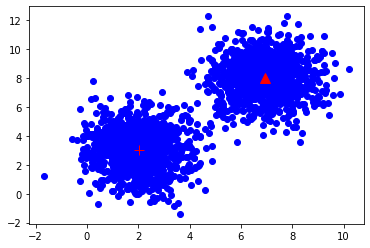

In [23]:
#原始数据点
plt.plot(points[:,0],points[:,1],'ob')
#聚类中心
plt.plot(c1[0],c1[1],'+r',markersize=10)
plt.plot(c2[0],c2[1],'^r',markersize=10)

## 使用sklearn中的工具包

In [10]:
from sklearn.cluster import KMeans

In [12]:
y_pred = KMeans(n_clusters=2,random_state=0).fit_predict(points)

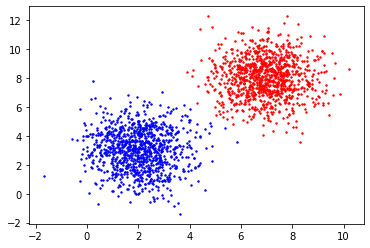

In [21]:
plt.scatter(points[y_pred==0,0],points[y_pred==0,1],s=2,c='r')
plt.scatter(points[y_pred==1,0],points[y_pred==1,1],s=2,c='b')